In [41]:
%matplotlib inline

# Command line interface

The harissa package provides a command line interface (cli).
Once the package is installed, a `harissa` program can be run from your terminal.
It allows people to use the package main functionalities without having to code any python lines.
Of course, you are welcome to use the [python API](../modules.md) if the cli doesn't satisfy your needs.

The cli provides 5 commands:

* infer
* trajectory
* dataset
* visualize
* convert


:::{warning}
The followings code cells start with an exclamation mark. 
It is there to run terminal commands from this jupyter notebook, make sure to remove it when you run commands from your terminal.
:::

## Format file

The package `harissa` use [numpy arrays](https://numpy.org/doc/stable/reference/arrays.html) to infer or simulate.

The following commands need to access arrays through files. 
`Numpy` provides file formats to export or import arrays:

* `npz`: multiple arrays inside 1 binary (compressed) file
* `npy`: 1 array inside a binary file
* `txt`: 1 array inside a text file

We decided to accept only  `npz` file or folder containing `txt` files.
We kept the `txt` files format because it allows to edit arrays easily.

:::{tip}
By default the output format is `.npz`, this format is compacted but it is not editable.
To generate editable output you can use the option `-f txt` for all the commands except convert.

You can also use the convert command to do it.

Once you finish the modification to some data you can convert it back to `.npz` thanks to the convert command.
:::


## Commands

The following examples are typical uses of the commands.
Each command has its own options, to see all the options please check [this section](#help-message).

:::{tip}
By default the output name is deduced from the parameters and it is placed in the current directory, you can use the option `-o` to change it.
:::


### Infer

The `infer` sub command infers a network parameter from a dataset.
The command can be run by typing:

In [61]:
!harissa infer data/data_old.npz

data_old_inference_result.npz


:::{note}
For backward compatibility the [old format](https://github.com/ulysseherbach/harissa?tab=readme-ov-file#basic-usage) is supported.

```console
$ harissa infer path/to/dataset.txt
```

:::

To choose a method of inference, you need to add **after the options of `infer`**
the name of the wanted method (followed by more options).

```console
$ harissa infer path/to/dataset hartree
$ harissa infer path/to/dataset hartree --verbose
```


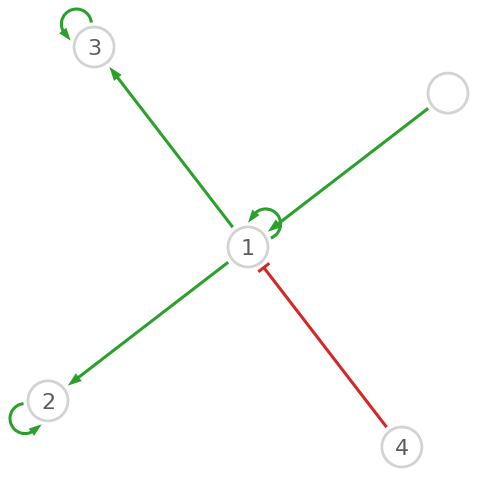

In [43]:
import numpy as np
from harissa.graphics import build_pos, plot_network

cutoff = 1.0
inter = np.load('data_old_inference_result.npz')['interaction']
inter = (np.abs(inter) > cutoff) * inter
plot_network(inter, build_pos(inter), scale=2)

### Trajectory

The `trajectory` command simulate a trajectory of a single cell.
It needs a path to the simulation parameters and a network parameter.
You can run the command by typing:  

In [44]:
!harissa trajectory data/simulation_param.npz data/network_param.npz -o simu_test

simu_test.npz


To choose a method of simulation, you need to add **after the options of `trajectory`**
the name of the wanted method (followed by more options).

```console
$ harissa trajectory path/to/simulation_param path/to/network_param ode
$ harissa trajectory path/to/simulation_param path/to/network_param ode --verbose
```

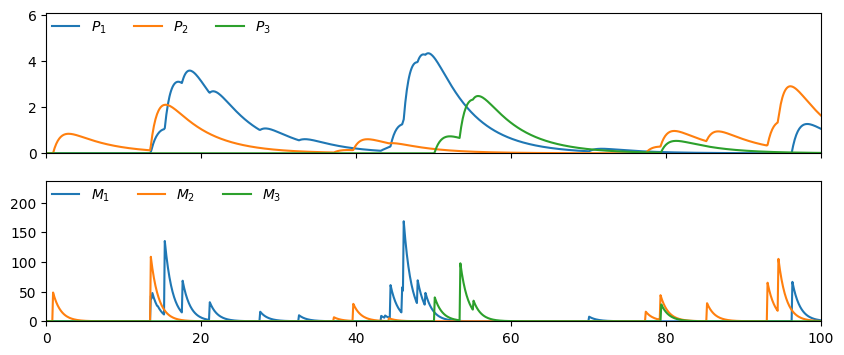

In [45]:
from harissa.graphics import plot_simulation
from harissa.core.simulation import Simulation

plot_simulation(Simulation.Result.load('simu_test.npz')).show(warn=False)

In [46]:
!harissa trajectory -o simu_test -f txt data/simulation_param.npz data/network_param.npz

simu_test


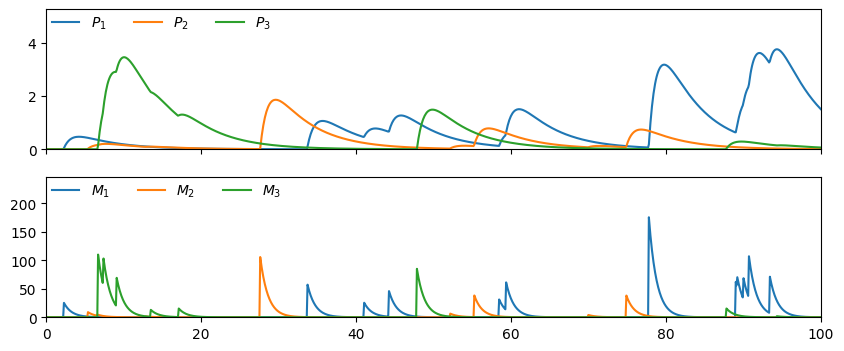

In [47]:
plot_simulation(Simulation.Result.load_txt('simu_test')).show(warn=False)

In [48]:
!harissa trajectory -o simu_ode data/simulation_param_ode.npz data/network_param.npz ode

simu_ode.npz


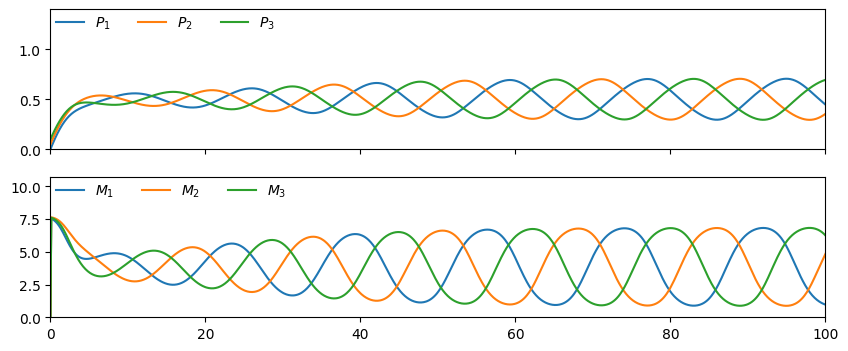

In [49]:
plot_simulation(Simulation.Result.load('simu_ode.npz')).show(warn=False)

### Dataset

The `dataset` command simulate TODO description
The output dataset will have the same cell number and the same time points than input dataset.

It needs a path to a dataset and a network parameter.
You can run the command by typing: 

In [50]:
!harissa dataset data/data_old.txt data_old_inference_result.npz

Traceback (most recent call last):                        | 🌶      10/1000 [1%] 
  File "/home/nseyler/Work/harissa/.venv/bin/harissa", line 8, in <module>
    sys.exit(main())
  File "/home/nseyler/Work/harissa/src/harissa/cli/__init__.py", line 45, in main
    args.run(args)
  File "/home/nseyler/Work/harissa/src/harissa/cli/dataset.py", line 65, in simulate_dataset
    model.simulate(
  File "/home/nseyler/Work/harissa/src/harissa/core/model.py", line 207, in simulate
    res = self.simulation.run(
  File "/home/nseyler/Work/harissa/src/harissa/simulation/bursty_pdmp/base.py", line 208, in run
    states, phantom_jump_count, true_jump_count = self._simulation(
  File "/home/nseyler/Work/harissa/src/harissa/simulation/bursty_pdmp/base.py", line 139, in simulation
    U, jump, state = step(state, basal, inter, d0, d1,
  File "/home/nseyler/Work/harissa/src/harissa/simulation/bursty_pdmp/base.py", line 66, in step
    U = np.random.exponential(scale=1/tau)
  File "numpy/random/mtrand.p

To choose a method of simulation, you need to add **after the options of `dataset`**
the name of the wanted method (followed by more options).

```console
$ harissa trajectory path/to/dataset path/to/network_param ode
$ harissa trajectory path/to/dataset path/to/network_param ode --verbose
```

### Convert

This `convert` command convert an `npz` file to folder containing `txt` arrays and vice versa.

It takes 
You can run the command by typing: 

In [51]:
!harissa convert data_old_inference_result.npz data_old_inference_result_convert_test

data_old_inference_result_convert_test


In [52]:
!harissa convert $(harissa convert data/data_old.txt)

data/data_old.npz


It also allows you to convert an [old format](https://github.com/ulysseherbach/harissa?tab=readme-ov-file#basic-usage) dataset (an `txt` file) to the new format (`npz` or folder containing `txt`).

In [53]:
!harissa convert data/data_old.txt data/data_old.npz

data/data_old.npz


:::{note}
It can deduce the output format from the input if the output path is not given.
:::

### Visualize

The `visualize` command compare 2 datasets and export the comparison.

It takes a reference dataset and a dataset.
You can run the command by typing:

In [54]:
!harissa visualize data/data_old.txt data_old_dataset_result.npz -dp

Traceback (most recent call last):
  File "/home/nseyler/Work/harissa/.venv/bin/harissa", line 8, in <module>
    sys.exit(main())
  File "/home/nseyler/Work/harissa/src/harissa/cli/__init__.py", line 45, in main
    args.run(args)
  File "/home/nseyler/Work/harissa/src/harissa/cli/visualize.py", line 18, in visualize
    dataset_sim = Dataset.load(args.sim_dataset_path) 
  File "/home/nseyler/Work/harissa/src/harissa/core/dataset.py", line 94, in load
    return cls(**load_npz(path, cls.param_names))
  File "/home/nseyler/Work/harissa/src/harissa/utils/npz_io.py", line 46, in load_npz
    raise RuntimeError(f"{path} doesn't exist.")
RuntimeError: data_old_dataset_result.npz doesn't exist.


### Arguments from file

With all these options, the command line can be long and it become exhausting to modify it inside the terminal.

To ease it, you can write the arguments inside a `.txt` file.

Then you can run:

```console
$ harissa @args.txt
```


## Help message

You can always display available options with an help message by using `-h` option.

### Global help

For example to display the command list:

In [55]:
!harissa -h

usage: harissa [-h] [-V] {infer,trajectory,dataset,visualize,convert} ...

Tools for mechanistic gene network inference from single-cell data

options:
  -h, --help            show this help message and exit
  -V, --version         show program's version number and exit

commands:
  {infer,trajectory,dataset,visualize,convert}
    infer               infer help
    trajectory          simulate a trajectory
    dataset             simulate a dataset
    visualize           visualize help
    convert             convert help


### Commands options

To display the commands options, you can display its help message by adding the `-h` option after the command name.

#### Infer help

In [56]:
!harissa infer -h

usage: harissa infer [-h] [-f {npz,txt}] [-o OUTPUT] [--save-plot]
                     [--cut-off CUT_OFF] [--save-extra]
                     dataset_path {hartree} ...

positional arguments:
  dataset_path          path to data file

options:
  -h, --help            show this help message and exit
  -f {npz,txt}, --format {npz,txt}
                        output's format. (default: npz)
  -o OUTPUT, --output OUTPUT
                        output path. It is a directory if the format is txt
                        else it is a .npz file. (default: None)
  --save-plot
  --cut-off CUT_OFF     method help (default: 1.0)
  --save-extra

inference methods:
  {hartree}


#### Trajectory help

In [57]:
!harissa trajectory -h 

usage: harissa trajectory [-h] [-b BURN_IN] [-f {npz,txt}] [-o OUTPUT]
                          [--save-plot]
                          simulation_parameter_path network_parameter_path
                          {bursty,ode} ...

positional arguments:
  simulation_parameter_path
                        path to simulation parameter. It is a .npz file or a
                        directory.
  network_parameter_path
                        path to network parameter. It is a .npz file or a
                        directory.

options:
  -h, --help            show this help message and exit
  -b BURN_IN, --burn-in BURN_IN
                        burn in duration. (override the initial state)
                        (default: None)
  -f {npz,txt}, --format {npz,txt}
                        output's format. (default: npz)
  -o OUTPUT, --output OUTPUT
                        output path. It is a directory if the format is txt
                        else it is a .npz file. (default: None)
  --s

#### Dataset help

In [58]:
!harissa dataset -h

usage: harissa dataset [-h] [-f {npz,txt}] [-o OUTPUT]
                       dataset_path network_parameter_path {bursty,ode} ...

positional arguments:
  dataset_path          path to dataset file
  network_parameter_path
                        path to network parameter. It is a .npz file or a
                        directory.

options:
  -h, --help            show this help message and exit
  -f {npz,txt}, --format {npz,txt}
                        output's format. (default: npz)
  -o OUTPUT, --output OUTPUT
                        output path. It is a directory if the format is txt
                        else it is a .npz file. (default: None)

simulation methods (optional):
  {bursty,ode}          specify it to choose the simulation method and to
                        parametrize it. If not specified the bursty method is
                        used by default.


#### Convert help

In [59]:
!harissa convert -h

usage: harissa convert [-h] path [output_path]

positional arguments:
  path         path to convert. It is a .npz file or a directory or a .txt
               (dataset).
  output_path  destination path. It is a .npz file or a directory.

options:
  -h, --help   show this help message and exit


#### Visualize help

In [60]:
!harissa visualize -h

usage: harissa visualize [-h] [-d] [-p] [-u] [-o OUTPUT]
                         ref_dataset_path sim_dataset_path

positional arguments:
  ref_dataset_path      path to the reference dataset
  sim_dataset_path      path to the simulated dataset

options:
  -h, --help            show this help message and exit
  -d, --distributions   plot the marginal distributions of the simulated genes
  -p, --pvalues         plot the comparison of the marginals using a
                        Kolmogorov-Smornov test
  -u, --umap            plot the UMAP reduction of the simulated dataset
  -o OUTPUT, --output OUTPUT
                        output path. It is a directory where pdf files are
                        saved.
